In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
%matplotlib ipympl

left, right, cells = -10,10,10000

x = np.linspace(left, right, cells)
dx = x[1] - x[0]


def solver(x, dx, U, g=9.8, timestep = 800, finaltime = 0.15):
    time = 0.001
    count = 0
    
    fig, axes = plt.subplots()
    camera = Camera(fig)
    axes.plot(x[:],U[0],'r')
    
    # yet implemented
    sol_error = [[0,0]]
    analytical = SWEAnalytical(g, U[0,0], U[0,-1])
    
    
    while (time < finaltime):
#     for step in range(timestep): 
        count += 1 
        h, uh = U[0,:], U[1,:]
        u = uh*h/(h**2 + 1.0e-12)

        E1 = uh
        E2 = u**2*h + (1/2)*g*h**2
        E = np.vstack((E1,E2))

        U_R, U_L = U[:,1:], U[:,:-1]
        E_R, E_L = E[:,1:], E[:,:-1]
        u_R, u_L = u[1:], u[:-1]         #
        h_R, h_L = h[1:], h[:-1]         # 

        a_plus  = np.maximum(np.maximum(u_L + np.sqrt(g*h_L), u_R + np.sqrt(g*h_R)), 0.0*u_L)
        a_minus = np.minimum(np.minimum(u_L - np.sqrt(g*h_L), u_R - np.sqrt(g*h_R)), 0.0*u_L)

        dt  = (dx)/max(np.max(a_plus),np.max(-a_minus))
        time += dt

        E_HLL = np.divide((a_plus * E_L - a_minus * E_R)+ a_plus*a_minus*(U_R - U_L),
                          (a_plus- a_minus),
                          out=np.zeros_like((a_plus * E_L - a_minus * E_R)+ a_plus*a_minus*(U_R - U_L)),
                          where = a_plus - a_minus != 0)


        E_R, E_L = E_HLL[:,1:], E_HLL[:,:-1]
        U[:,1:-1] -= dt/dx*(E_R - E_L)   
        U[1,-2] = -U[1,-2]
        U[1,1] = -U[1,1]
        
        h_an, u_an = analytical.dambreak_dry(x, time)
        uh_an = h_an*u_an
        
        error1 = np.linalg.norm(U[0,3:-3]-h_an[3:-3])
        error2 = np.linalg.norm(U[1,3:-3]-u_an[3:-3])
        
        error = [error1, error2]
        sol_error.append(error)
        
        axes.plot(x[3:-3],U[0,3:-3],'b')
        camera.snap()

    print('time step=',count)
    animation = camera.animate(blit=False, interval=10)
    
    play = HTML(animation.to_html5_video())
    plt.close('all')
    return(U, E, sol_error, play)

In [2]:
class SWEAnalytical:
    
    def __init__(self, g, h_inlet, h_outlet):
        self.g = g
        self.h_inlet = h_inlet
        self.h_outlet = h_outlet
        
    def dambreak_wet(self, x, t):
        pass
    
    def dambreak_dry(self, x, t):
        
        # x has to be an array of points
        # t is a number
        
        h1 = self.h_inlet
        g = self.g
        
        h = np.zeros(x.shape)
        h = np.where(x <= -t*np.sqrt(g*h1), h1, \
                     np.where(x <= 2*t*np.sqrt(g*h1), (4/(9*g))*(np.sqrt(g*h1) - x/(2*t))**2, h))
            
        u = np.zeros(x.shape)
        u = np.where((-t*np.sqrt(g*h1) < x) & (x <= 2*t*np.sqrt(g*h1)), (2/3)*(np.sqrt(g*h1) + x/t), u)
        
        return h, u

In [3]:
# initial 

h_up, h_down = np.ones(cells//2), np.ones(cells//2)*0
h = np.append(h_up, h_down)
uh = h*0
U = np.vstack((h,uh))

In [4]:
g, h_inlet, h_outlet = 9.8, 1.0, 0.0
analytical = SWEAnalytical(g, h_inlet, h_outlet)

## t = 0.2

In [5]:
U, E, sol_error, play = solver(x,dx,U,finaltime=0.15)
U_anl = analytical.dambreak_dry(x, 0.15)

time step= 425


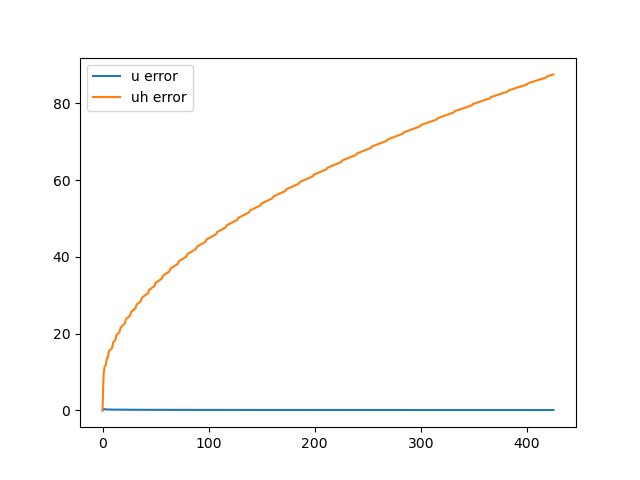

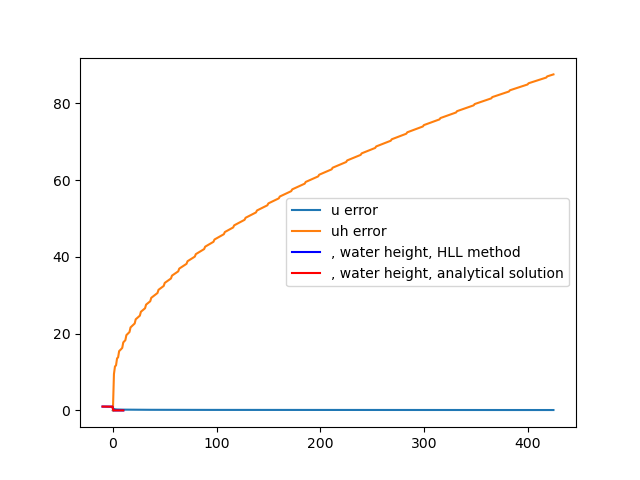

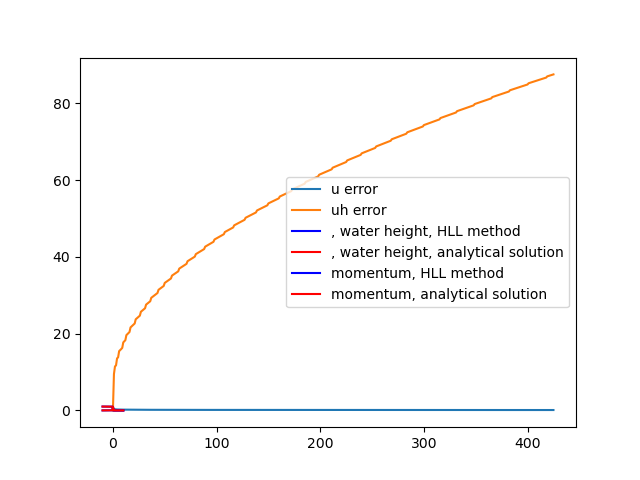

In [6]:
sol_error = np.array(sol_error)
n, t_ = np.shape(sol_error)
t=np.arange(n)

plt.plot(t,sol_error[:,0],label='u error')
plt.plot(t,sol_error[:,1],label='uh error')
plt.legend()
plt.show()

plt.plot(x,U[0], "b" ,label=', water height, HLL method')
plt.plot(x,U_anl[0],"r",label=", water height, analytical solution")
plt.legend()
plt.show()

plt.plot(x,U[1], "b", label='momentum, HLL method')
plt.plot(x,U_anl[1]*U_anl[0],"r",label="momentum, analytical solution")
plt.legend()
plt.show()

## t = 0.23

time step= 688


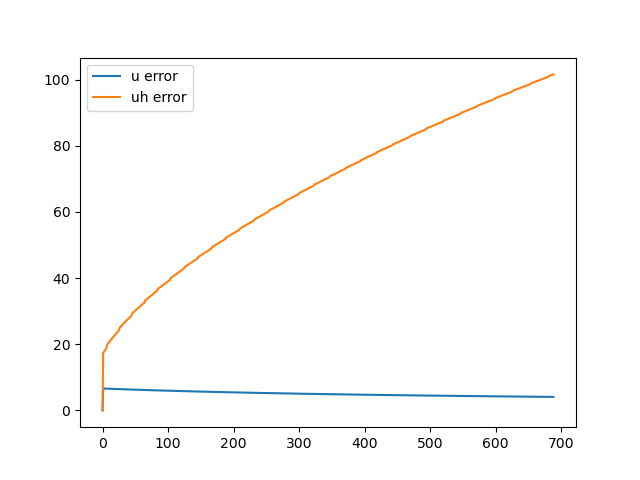

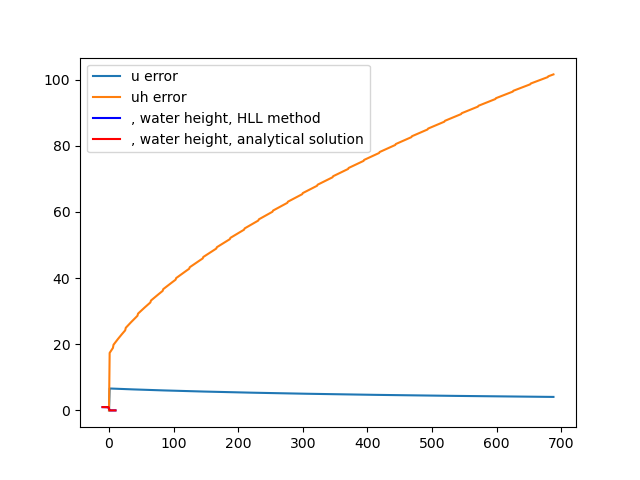

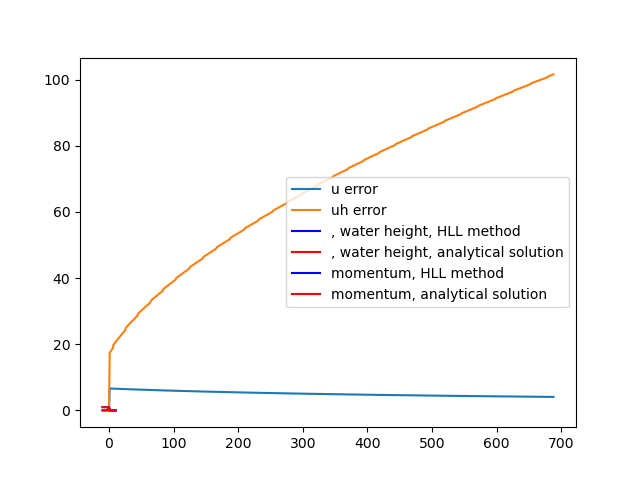

In [7]:
U, E, sol_error, play = solver(x,dx,U,finaltime=0.23)
U_anl = analytical.dambreak_dry(x, 0.23)

sol_error = np.array(sol_error)
n, t_ = np.shape(sol_error)
t=np.arange(n)

plt.plot(t,sol_error[:,0],label='u error')
plt.plot(t,sol_error[:,1],label='uh error')
plt.legend()
plt.show()

plt.plot(x,U[0], "b" ,label=', water height, HLL method')
plt.plot(x,U_anl[0],"r",label=", water height, analytical solution")
plt.legend()
plt.show()

plt.plot(x,U[1], "b", label='momentum, HLL method')
plt.plot(x,U_anl[1]*U_anl[0],"r",label="momentum, analytical solution")
plt.legend()
plt.show()

## t = 0.25

time step= 755


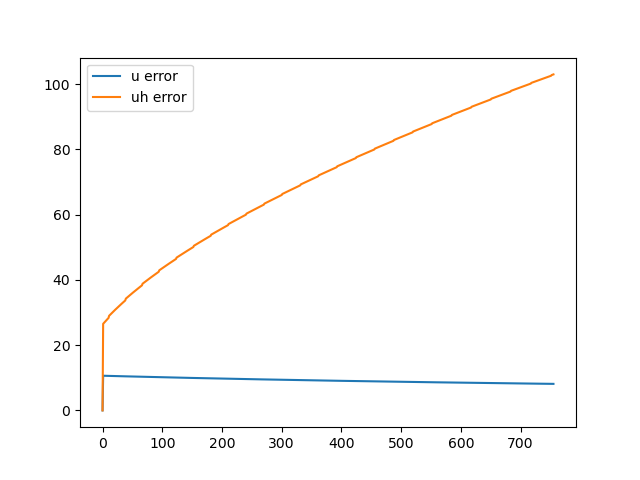

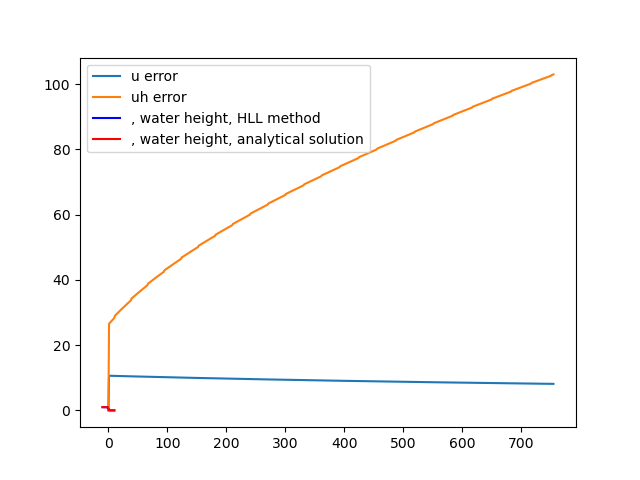

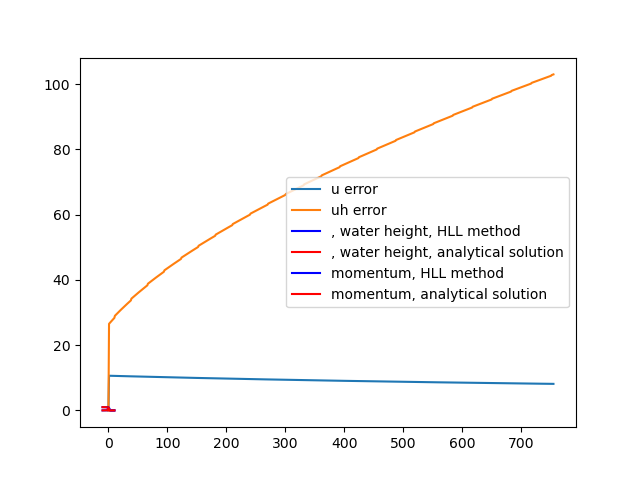

In [8]:
U, E, sol_error, play = solver(x,dx,U,finaltime=0.25)
U_anl = analytical.dambreak_dry(x, 0.25)

sol_error = np.array(sol_error)
n, t_ = np.shape(sol_error)
t=np.arange(n)

plt.plot(t,sol_error[:,0],label='u error')
plt.plot(t,sol_error[:,1],label='uh error')
plt.legend()
plt.show()

plt.plot(x,U[0], "b" ,label=', water height, HLL method')
plt.plot(x,U_anl[0],"r",label=", water height, analytical solution")
plt.legend()
plt.show()

plt.plot(x,U[1], "b", label='momentum, HLL method')
plt.plot(x,U_anl[1]*U_anl[0],"r",label="momentum, analytical solution")
plt.legend()
plt.show()

time step= 759


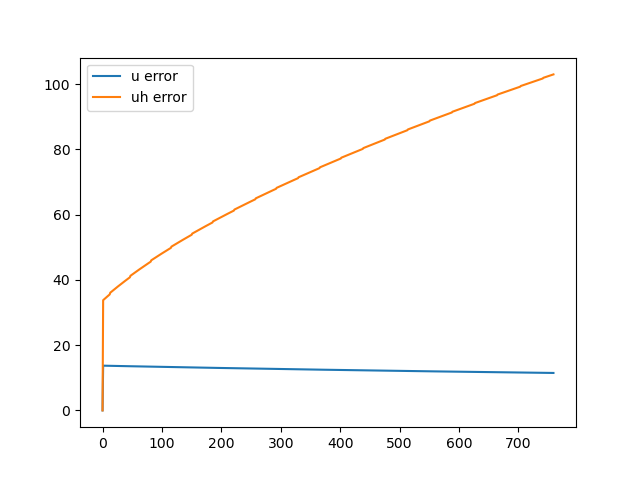

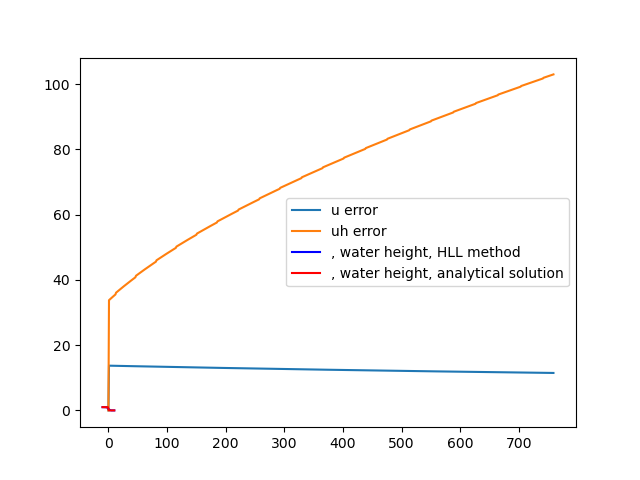

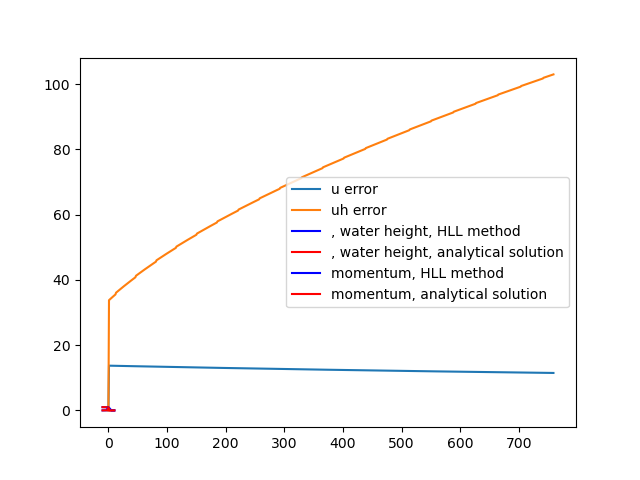

In [9]:
U, E, sol_error, play = solver(x,dx,U,finaltime=0.25)
U_anl = analytical.dambreak_dry(x, 0.25)

sol_error = np.array(sol_error)
n, t_ = np.shape(sol_error)
t=np.arange(n)

plt.plot(t,sol_error[:,0],label='u error')
plt.plot(t,sol_error[:,1],label='uh error')
plt.legend()
plt.show()

plt.plot(x,U[0], "b" ,label=', water height, HLL method')
plt.plot(x,U_anl[0],"r",label=", water height, analytical solution")
plt.legend()
plt.show()

plt.plot(x,U[1], "b", label='momentum, HLL method')
plt.plot(x,U_anl[1]*U_anl[0],"r",label="momentum, analytical solution")
plt.legend()
plt.show()

## t = 0.4 

time step= 1220


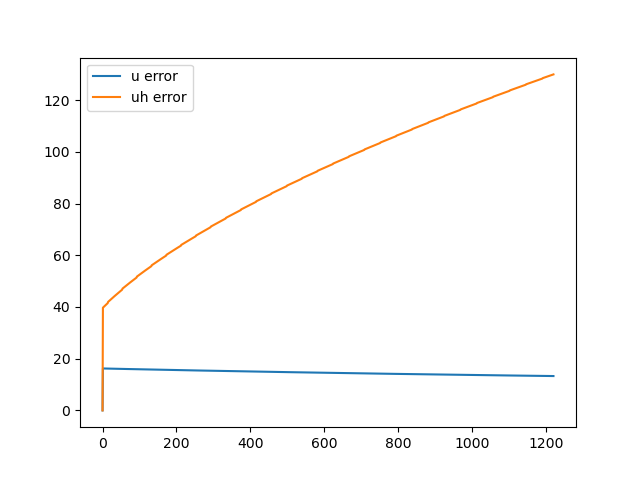

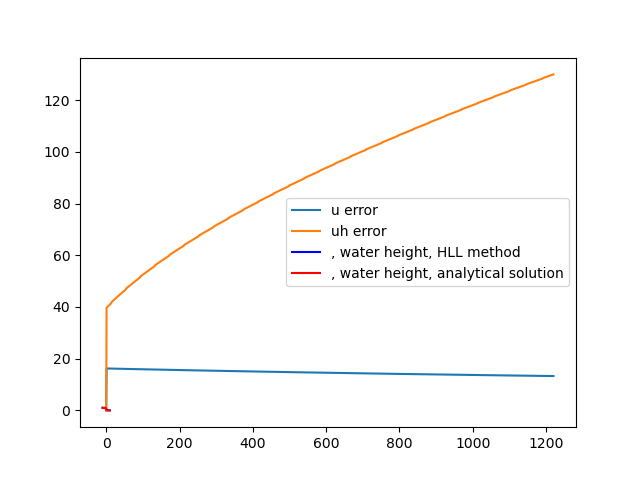

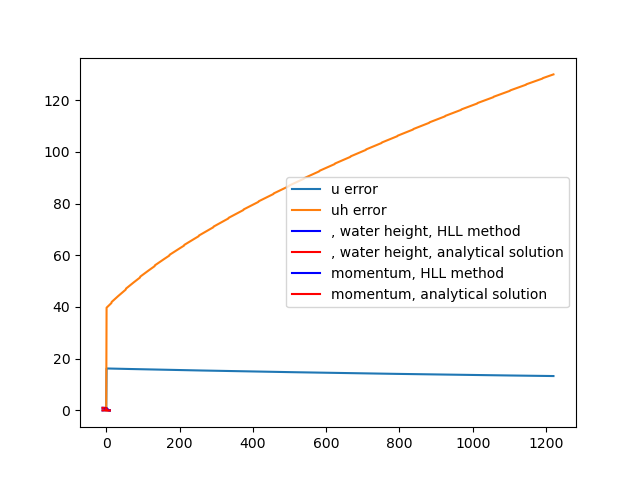

In [10]:
U, E, sol_error, play = solver(x,dx,U,finaltime=0.4)
U_anl = analytical.dambreak_dry(x, 0.4)

sol_error = np.array(sol_error)
n, t_ = np.shape(sol_error)
t=np.arange(n)

plt.plot(t,sol_error[:,0],label='u error')
plt.plot(t,sol_error[:,1],label='uh error')
plt.legend()
plt.show()

plt.plot(x,U[0], "b" ,label=', water height, HLL method')
plt.plot(x,U_anl[0],"r",label=", water height, analytical solution")
plt.legend()
plt.show()

plt.plot(x,U[1], "b", label='momentum, HLL method')
plt.plot(x,U_anl[1]*U_anl[0],"r",label="momentum, analytical solution")
plt.legend()
plt.show()

In [11]:
play